In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import geopandas as gpd
from geopandas.tools import sjoin
from matplotlib.offsetbox import AnchoredText
import matplotlib.cm
import matplotlib.colors as colors
import geoplot as gplt
import matplotlib.animation as animation
import glob

In [15]:
Town_names=[]
Date=[]
Cases=[]

Town=pd.read_csv('Towns.csv')
path = "Extracted/*.csv"
for fname in glob.glob(path):
    Dat=pd.read_csv(fname)
    Dat[Dat['Town']=='Town']=np.nan
    Dat = Dat.dropna()
    if Dat.shape[1]>3:
        Dat=Dat[['Town','Cases']].append(Dat[['Town.1','Cases.1']].rename(columns={'Town.1': 'Town', 'Cases.1': 'Cases'})).append(Dat[['Town.2','Cases.2']].rename(columns={'Town.2': 'Town', 'Cases.2': 'Cases'}))
    Town_names.append(np.array(Dat['Town']).transpose())
    Cases.append(np.array(Dat['Cases']).transpose())
    Date_temp=fname.split('\\')[1][0:-4]
    Date_temp2=str(Date_temp[0]+"/"+Date_temp[1:3]+"/"+Date_temp[3:7])
    Date_temp2=np.tile(Date_temp2,len(Dat))
    Date.append(Date_temp2)


In [16]:
Town_names_final=np.concatenate(Town_names, axis=0)
Cases_final=np.concatenate(Cases, axis=0)
Date_final=np.concatenate(Date, axis=0)

In [17]:
Final=pd.DataFrame([Town_names_final,Cases_final,Date_final]).transpose()
Final.columns=['Town','Cases','Date']

In [18]:
Town['Town']=Town['NAME10']
Town['Lat']=Town['INTPTLAT10']
Town['Lon']=Town['INTPTLON10']

In [19]:
Fin=pd.merge(Final, Town[['Town','Lat','Lon']],on='Town')
Fin['Town'] = Fin['Town'].astype(str) 
Fin['Cases'] = Fin['Cases'].astype(int) 
Fin['Date'] = Fin['Date'].astype(str) 
Fin=Fin.sort_values('Date').reset_index()

In [20]:
Fin.to_csv('CT_towns.csv', index=False)

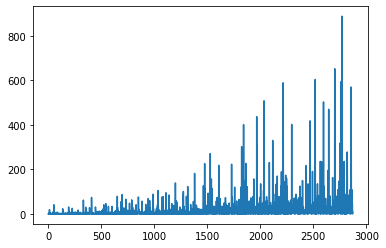

In [158]:
plt.plot(Fin['Cases'])

In [147]:
Fin['Cases']

0        0
304      0
1056     0
1520     3
2351     0
        ..
271     40
1151     3
1551    53
2206    84
2702     7
Name: Cases, Length: 2703, dtype: int32

In [22]:
Dat2=Dat[['Town','Cases']].append(Dat[['Town.1','Cases.1']].rename(columns={'Town.1': 'Town', 'Cases.1': 'Cases'})).append(Dat[['Town.2','Cases.2']].rename(columns={'Town.2': 'Town', 'Cases.2': 'Cases'}))

In [5]:
Dat

,Town,Cases,Town.1,Cases.1,Town.2,Cases.2
0,Andover,0.0,Griswold,3.0,Prospect,15.0
1,Ansonia,39.0,Groton,8.0,Putnam,1.0
2,Ashford,4.0,Guilford,23.0,Redding,23.0
3,Avon,12.0,Haddam,2.0,Ridgefield,111.0
4,Barkhamsted,2.0,Hamden,121.0,Rocky Hill,45.0
5,Beacon Falls,12.0,Hampton,0.0,Roxbury,3.0
6,Berlin,24.0,Hartford,165.0,Salem,1.0
7,Bethany,4.0,Hartland,0.0,Salisbury,4.0
8,Bethel,79.0,Harwinton,6.0,Scotland,0.0
9,Bethlehem,4.0,Hebron,5.0,Seymour,34.0


In [14]:
Dat=pd.read_csv('Extracted/4072020.csv', sep="|").split(',')

AttributeError: 'DataFrame' object has no attribute 'split'

In [13]:
Dat

,"Town,Cases,Town,Cases,Town,Cases"
0,"Andover,0,Griswold,3,Prospect,15"
1,"Ansonia,39,Groton,8,Putnam,1"
2,"Ashford,4,Guilford,23,Redding,23"
3,"Avon,12,Haddam,2,Ridgefield,111"
4,"Barkhamsted,2,Hamden,121,Rocky Hill,45"
5,"Beacon Falls,12,Hampton,0,Roxbury,3"
6,"Berlin,24,Hartford,165,Salem,1"
7,"Bethany,4,Hartland,0,Salisbury,4"
8,"Bethel,79,Harwinton,6,Scotland,0"
9,"Bethlehem,4,Hebron,5,Seymour,34"
